In [3]:
from dataloader import load_data_label_encoded
from trainer import train_model, evaluate_model
from snn import SNNModelSimple
import torch
import matplotlib.pyplot as plt
import pickle

In [5]:
root_folder = "./tactile_dataset/"
file_name = "final_merged_df_sw500.csv"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

train_losses_beta = {}
train_accuracies_beta = {}
val_losses_beta = {}
val_accuracies_beta = {}
test_accuracies_beta = {}
for i, beta in enumerate([0.6, 0.7, 0.8, 0.9, 0.99, 0.999, 1]):
    print(f"Training for beta={beta}")
    train_loader, val_loader, test_loader, num_outputs, num_features = load_data_label_encoded(root_folder, file_name, spike_encoding='temproal', num_steps=50, batch_size=128, device=device)

    model = SNNModelSimple(num_features, num_outputs, beta=beta)
    model.to(device)
    criterion = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

    train_losses, train_accuracies, val_losses, val_accuracies = train_model(model, train_loader, val_loader, optimizer, criterion, num_epochs=10)
    train_losses_beta[i] = train_losses
    train_accuracies_beta[i] = train_accuracies
    val_losses_beta[i] = val_losses
    val_accuracies_beta[i] = val_accuracies

    test_accuracies_beta[i] = evaluate_model(model, test_loader)

out_file_name = 'exp2_temporal_beta_06_09_bs_128_ep_10_T_100.pkl' 
with open(out_file_name, 'wb') as f:
    pickle.dump({"train_losses": train_losses_beta, "train_accuracies": train_accuracies_beta, "val_losses": val_losses_beta, "val_accuracies": val_accuracies_beta, "test_accuracies": test_accuracies_beta}, f)


cpu
Training for beta=0.6
Epoch 1/10, Train Loss: 2.3781, Train Accuracy: 13.35%, Val Loss: 2.1162, Val Accuracy: 23.65%, Time: 14.12s
Epoch 2/10, Train Loss: 2.0430, Train Accuracy: 27.03%, Val Loss: 1.9344, Val Accuracy: 30.63%, Time: 14.65s
Epoch 3/10, Train Loss: 1.9700, Train Accuracy: 31.20%, Val Loss: 1.9773, Val Accuracy: 32.18%, Time: 14.83s
Epoch 4/10, Train Loss: 1.9032, Train Accuracy: 34.10%, Val Loss: 1.8488, Val Accuracy: 36.38%, Time: 14.59s
Epoch 5/10, Train Loss: 1.8225, Train Accuracy: 36.90%, Val Loss: 1.8089, Val Accuracy: 38.62%, Time: 14.61s
Epoch 6/10, Train Loss: 1.7578, Train Accuracy: 39.18%, Val Loss: 1.6953, Val Accuracy: 40.68%, Time: 14.93s
Epoch 7/10, Train Loss: 1.7174, Train Accuracy: 40.18%, Val Loss: 1.7084, Val Accuracy: 39.60%, Time: 15.13s
Epoch 8/10, Train Loss: 1.7080, Train Accuracy: 40.28%, Val Loss: 1.6415, Val Accuracy: 42.99%, Time: 14.87s
Epoch 9/10, Train Loss: 1.6580, Train Accuracy: 42.09%, Val Loss: 1.6599, Val Accuracy: 41.95%, Time: 

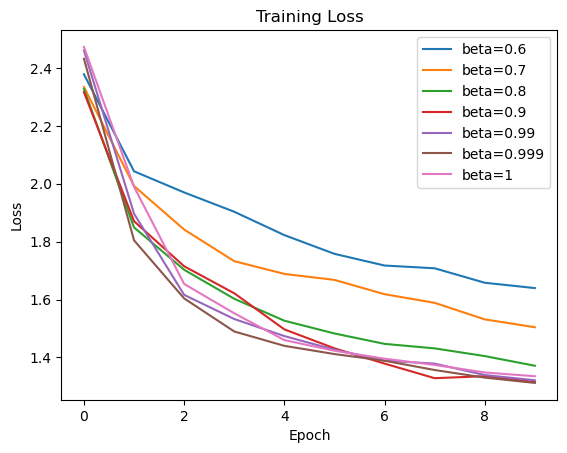

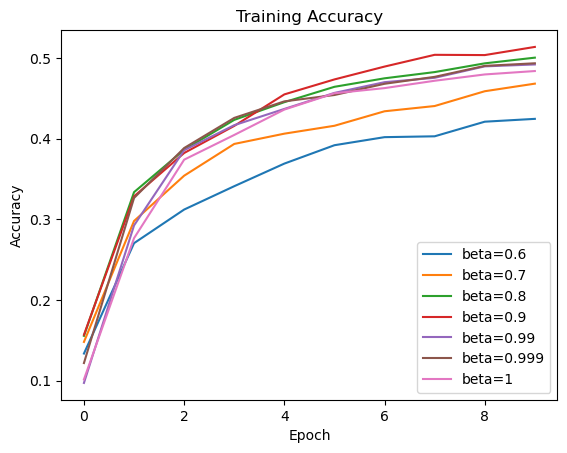

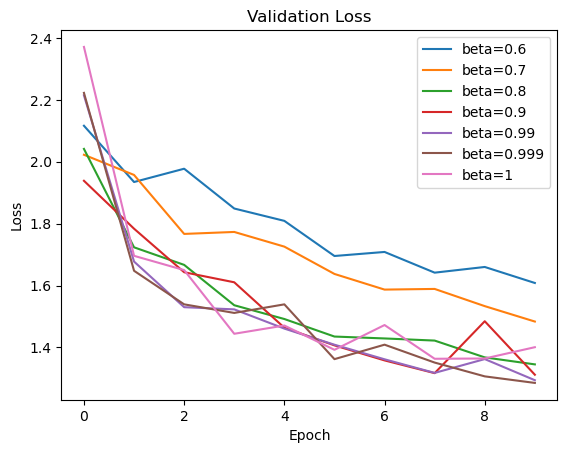

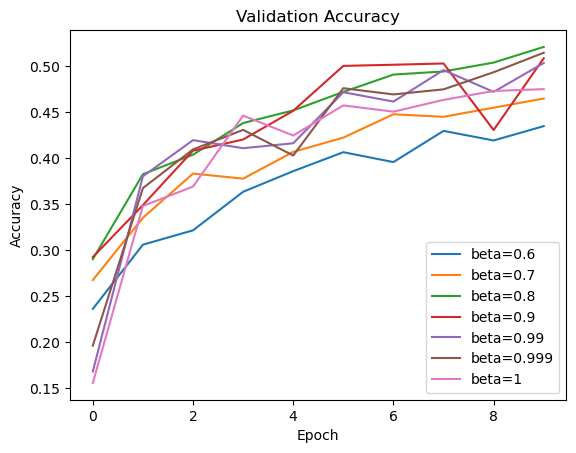

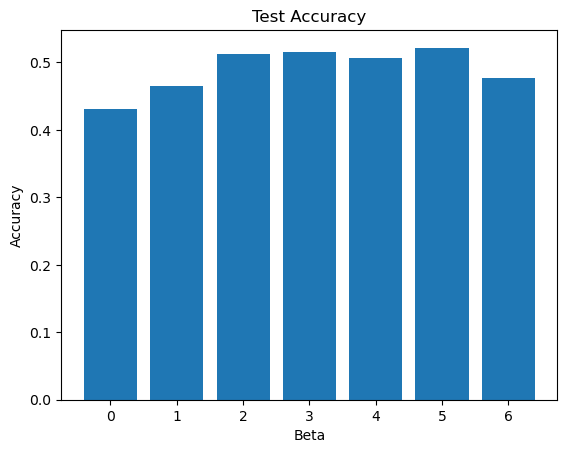

In [6]:
# Plotting
plt.figure()
for i, beta in enumerate([0.6, 0.7, 0.8, 0.9, 0.99, 0.999, 1]):
    plt.plot(train_losses_beta[i], label=f"beta={beta}")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Training Loss")
    plt.legend()

plt.figure()
for i, beta in enumerate([0.6, 0.7, 0.8, 0.9, 0.99, 0.999, 1]):
    plt.plot(train_accuracies_beta[i], label=f"beta={beta}")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.title("Training Accuracy")
    plt.legend()

plt.figure()
for i, beta in enumerate([0.6, 0.7, 0.8, 0.9, 0.99, 0.999, 1]):
    plt.plot(val_losses_beta[i], label=f"beta={beta}")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Validation Loss")
    plt.legend()

plt.figure()
for i, beta in enumerate([0.6, 0.7, 0.8, 0.9, 0.99, 0.999, 1]):
    plt.plot(val_accuracies_beta[i], label=f"beta={beta}")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.title("Validation Accuracy")
    plt.legend()

plt.figure()
plt.bar(range(len(test_accuracies_beta)), list(test_accuracies_beta.values()), align='center')
plt.xticks(range(len(test_accuracies_beta)), list(test_accuracies_beta.keys()))
plt.xlabel("Beta")
plt.ylabel("Accuracy")
plt.title("Test Accuracy")
plt.show()
